# Practica Final
Modulo 4 - Máster Data Science y Business Analytics
Sergio Hervás Aragón

### Librerías

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
import warnings
warnings.filterwarnings('ignore')

## 1. EDA

### 1.1. Carga de datos

In [2]:
file = './caso_final_small_20k_con_mes.csv'
df = pd.read_csv(file, sep=',')

In [3]:
df.head()

,MES,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,MB_MENSUALES,EDAD,NUM_LLAMADAS_RED_PROPIA,...,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,SERVICIOS_TOTALES_POSPAGO,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET
0,201901,232.121597,10.186000,0.000000,4523.0,1183.0,28.0,232.121597,39.0,54.0,...,21.683399,0,1.767800,0,100.0,2,1,0.0,0.264612,0
1,201911,18280.292969,32.005001,26.450001,13288.0,9194.0,49.0,18280.292969,25.0,152.0,...,166.050007,435,5.555000,0,100.0,1,2,0.0,0.380171,0
2,201906,2141.692810,37.442001,31.400000,13.0,13.0,0.0,2141.692810,47.0,4.0,...,108.850102,0,2.042002,0,100.0,2,2,0.0,0.156041,0
3,202006,3181.986496,20.001000,16.530000,0.0,0.0,0.0,3181.986496,43.0,0.0,...,65.799899,0,3.471001,0,100.0,2,3,0.0,0.228810,1
4,202001,25626.083984,37.005001,26.450001,72783.0,27609.0,151.0,25626.083984,40.0,329.0,...,519.683305,1,5.555000,0,100.0,1,1,0.0,0.210286,1


In [4]:
print(u'- El número de filas en el dataset es: {}'.format(df.shape[0]))
print(u'- El número de columnas en el dataset es: {}'.format(df.shape[1]))
print(u'- La variable objetivo es: {}'.format(df.columns[-1]))
print(u'- Los nombres de las variables independientes son: {}'.format(list(df.columns[:-1])))

- El número de filas en el dataset es: 20000
- El número de columnas en el dataset es: 36
- La variable objetivo es: TARGET
- Los nombres de las variables independientes son: ['MES', 'MB_TOTALES', 'FACTURACION_TOTAL_IMPUESTOS', 'FACTURACION_CUOTA', 'SEGUNDOS_LLAMADA_RED_PROPIA', 'SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA', 'SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA', 'MB_MENSUALES', 'EDAD', 'NUM_LLAMADAS_RED_PROPIA', 'FACTURACION_TOTAL_SIN_IMPUESTOS', 'NUM_LINEAS_PRIN_POSPAGO', 'NUM_LINEAS_POSPAGO', 'NUM_LINEAS_FIJAS', 'NUM_DIAS_CONVERGENTE', 'NUM_LINEAS_FIJAS_POSPAGO', 'NUM_SERVICIOS_POSPAGO', 'DIAS_PRIMERA_CUENTA', 'NUM_CANCELACIONES', 'LLAMADAS_MOVILES', 'NUM_LINEAS_POSPAGO_TOTAL', 'TERMINO_FACTURACION', 'NUM_DESACTIVACIONES_FIJAS_POSPAGO', 'NUM_DESACTIVACIONES_FIJAS', 'NUM_LINEAS_TECNOLOGIA_DESCONOCIDA', 'NUM_DIAS_ACTIVO', 'MINUTOS_LLAMADAS_MENSUALES', 'NUM_DIAS_BUNDLE', 'KPI_IMPUESTOS', 'NUM_DESACTIVACIONES', 'PORCENTAJE_SEGUNDOS_RED_PROPIA', 'SERVICIOS_TOTALES_MARCA', 'SERVICIOS_TOTALES_PO

### 1.2. Descripción y Análisis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MES                                   20000 non-null  int64  
 1   MB_TOTALES                            19741 non-null  float64
 2   FACTURACION_TOTAL_IMPUESTOS           19924 non-null  float64
 3   FACTURACION_CUOTA                     19924 non-null  float64
 4   SEGUNDOS_LLAMADA_RED_PROPIA           19843 non-null  float64
 5   SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  19843 non-null  float64
 6   SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA  19843 non-null  float64
 7   MB_MENSUALES                          19749 non-null  float64
 8   EDAD                                  19971 non-null  float64
 9   NUM_LLAMADAS_RED_PROPIA               19843 non-null  float64
 10  FACTURACION_TOTAL_SIN_IMPUESTOS       19924 non-null  float64
 11  NUM_LINEAS_PRIN

### 1.3. Variables continuas

In [6]:
df.describe()

,MES,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,MB_MENSUALES,EDAD,NUM_LLAMADAS_RED_PROPIA,...,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,SERVICIOS_TOTALES_POSPAGO,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET
count,20000.000000,19741.000000,19924.000000,19924.000000,19843.000000,19843.000000,19843.000000,19749.000000,19971.000000,19843.000000,...,19749.000000,20000.000000,19924.000000,20000.00000,19737.000000,20000.000000,20000.000000,19918.000000,18677.000000,20000.000000
mean,201948.470400,12307.320625,40.939452,25.179305,19282.843471,10334.947941,62.941239,12288.026161,43.990937,156.408456,...,361.817034,148.792200,5.657482,0.00785,99.975217,1.432750,1.792750,0.913010,0.257017,0.311050
std,49.255692,20115.499610,30.326117,13.067181,31773.406451,18971.928733,93.528782,20112.795794,14.125926,227.913588,...,543.391221,476.199046,3.552509,0.10435,1.284268,0.756972,1.329882,30.432569,0.073077,0.462935
min,201901.000000,0.000000,-0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,...,0.000000,0.000000,-1.190000,0.00000,0.000000,1.000000,0.000000,0.000000,0.039562,0.000000
25%,201905.000000,1929.673340,24.999000,15.700000,1777.000000,705.500000,11.000000,1915.529785,33.000000,29.000000,...,64.999998,0.000000,3.297000,0.00000,100.000000,1.000000,1.000000,0.000000,0.199451,0.000000
50%,201911.000000,5931.522949,33.004000,23.969999,8011.000000,3631.000000,36.000000,5898.413086,43.000000,87.000000,...,178.966798,1.000000,5.034000,0.00000,100.000000,1.000000,1.000000,0.000000,0.261877,0.000000
75%,202005.000000,16013.454310,50.124250,26.460000,23009.500000,11846.500000,82.000000,15967.201660,54.000000,199.000000,...,443.583287,2.000000,6.768002,0.00000,100.000000,2.000000,2.000000,0.000000,0.296955,1.000000
max,202011.000000,853613.593750,1246.438000,133.890000,584239.000000,422724.000000,6220.000000,853613.593750,98.000000,12497.000000,...,12316.250395,4056.000000,93.483509,4.00000,100.000000,8.000000,18.000000,2089.316758,0.380171,1.000000


In [7]:
valores_distintos = df.select_dtypes(include=['float64', 'int']).nunique()
valores_distintos

MES                                        23
MB_TOTALES                              19271
FACTURACION_TOTAL_IMPUESTOS             11220
FACTURACION_CUOTA                        1329
SEGUNDOS_LLAMADA_RED_PROPIA             13782
SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA    11310
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA      522
MB_MENSUALES                            19254
EDAD                                       78
NUM_LLAMADAS_RED_PROPIA                  1076
FACTURACION_TOTAL_SIN_IMPUESTOS         10741
NUM_LINEAS_PRIN_POSPAGO                     6
NUM_LINEAS_POSPAGO                          8
NUM_LINEAS_FIJAS                            3
NUM_DIAS_CONVERGENTE                      484
NUM_LINEAS_FIJAS_POSPAGO                    3
NUM_SERVICIOS_POSPAGO                       8
DIAS_PRIMERA_CUENTA                      3628
NUM_CANCELACIONES                          16
LLAMADAS_MOVILES                           40
NUM_LINEAS_POSPAGO_TOTAL                   16
TERMINO_FACTURACION               

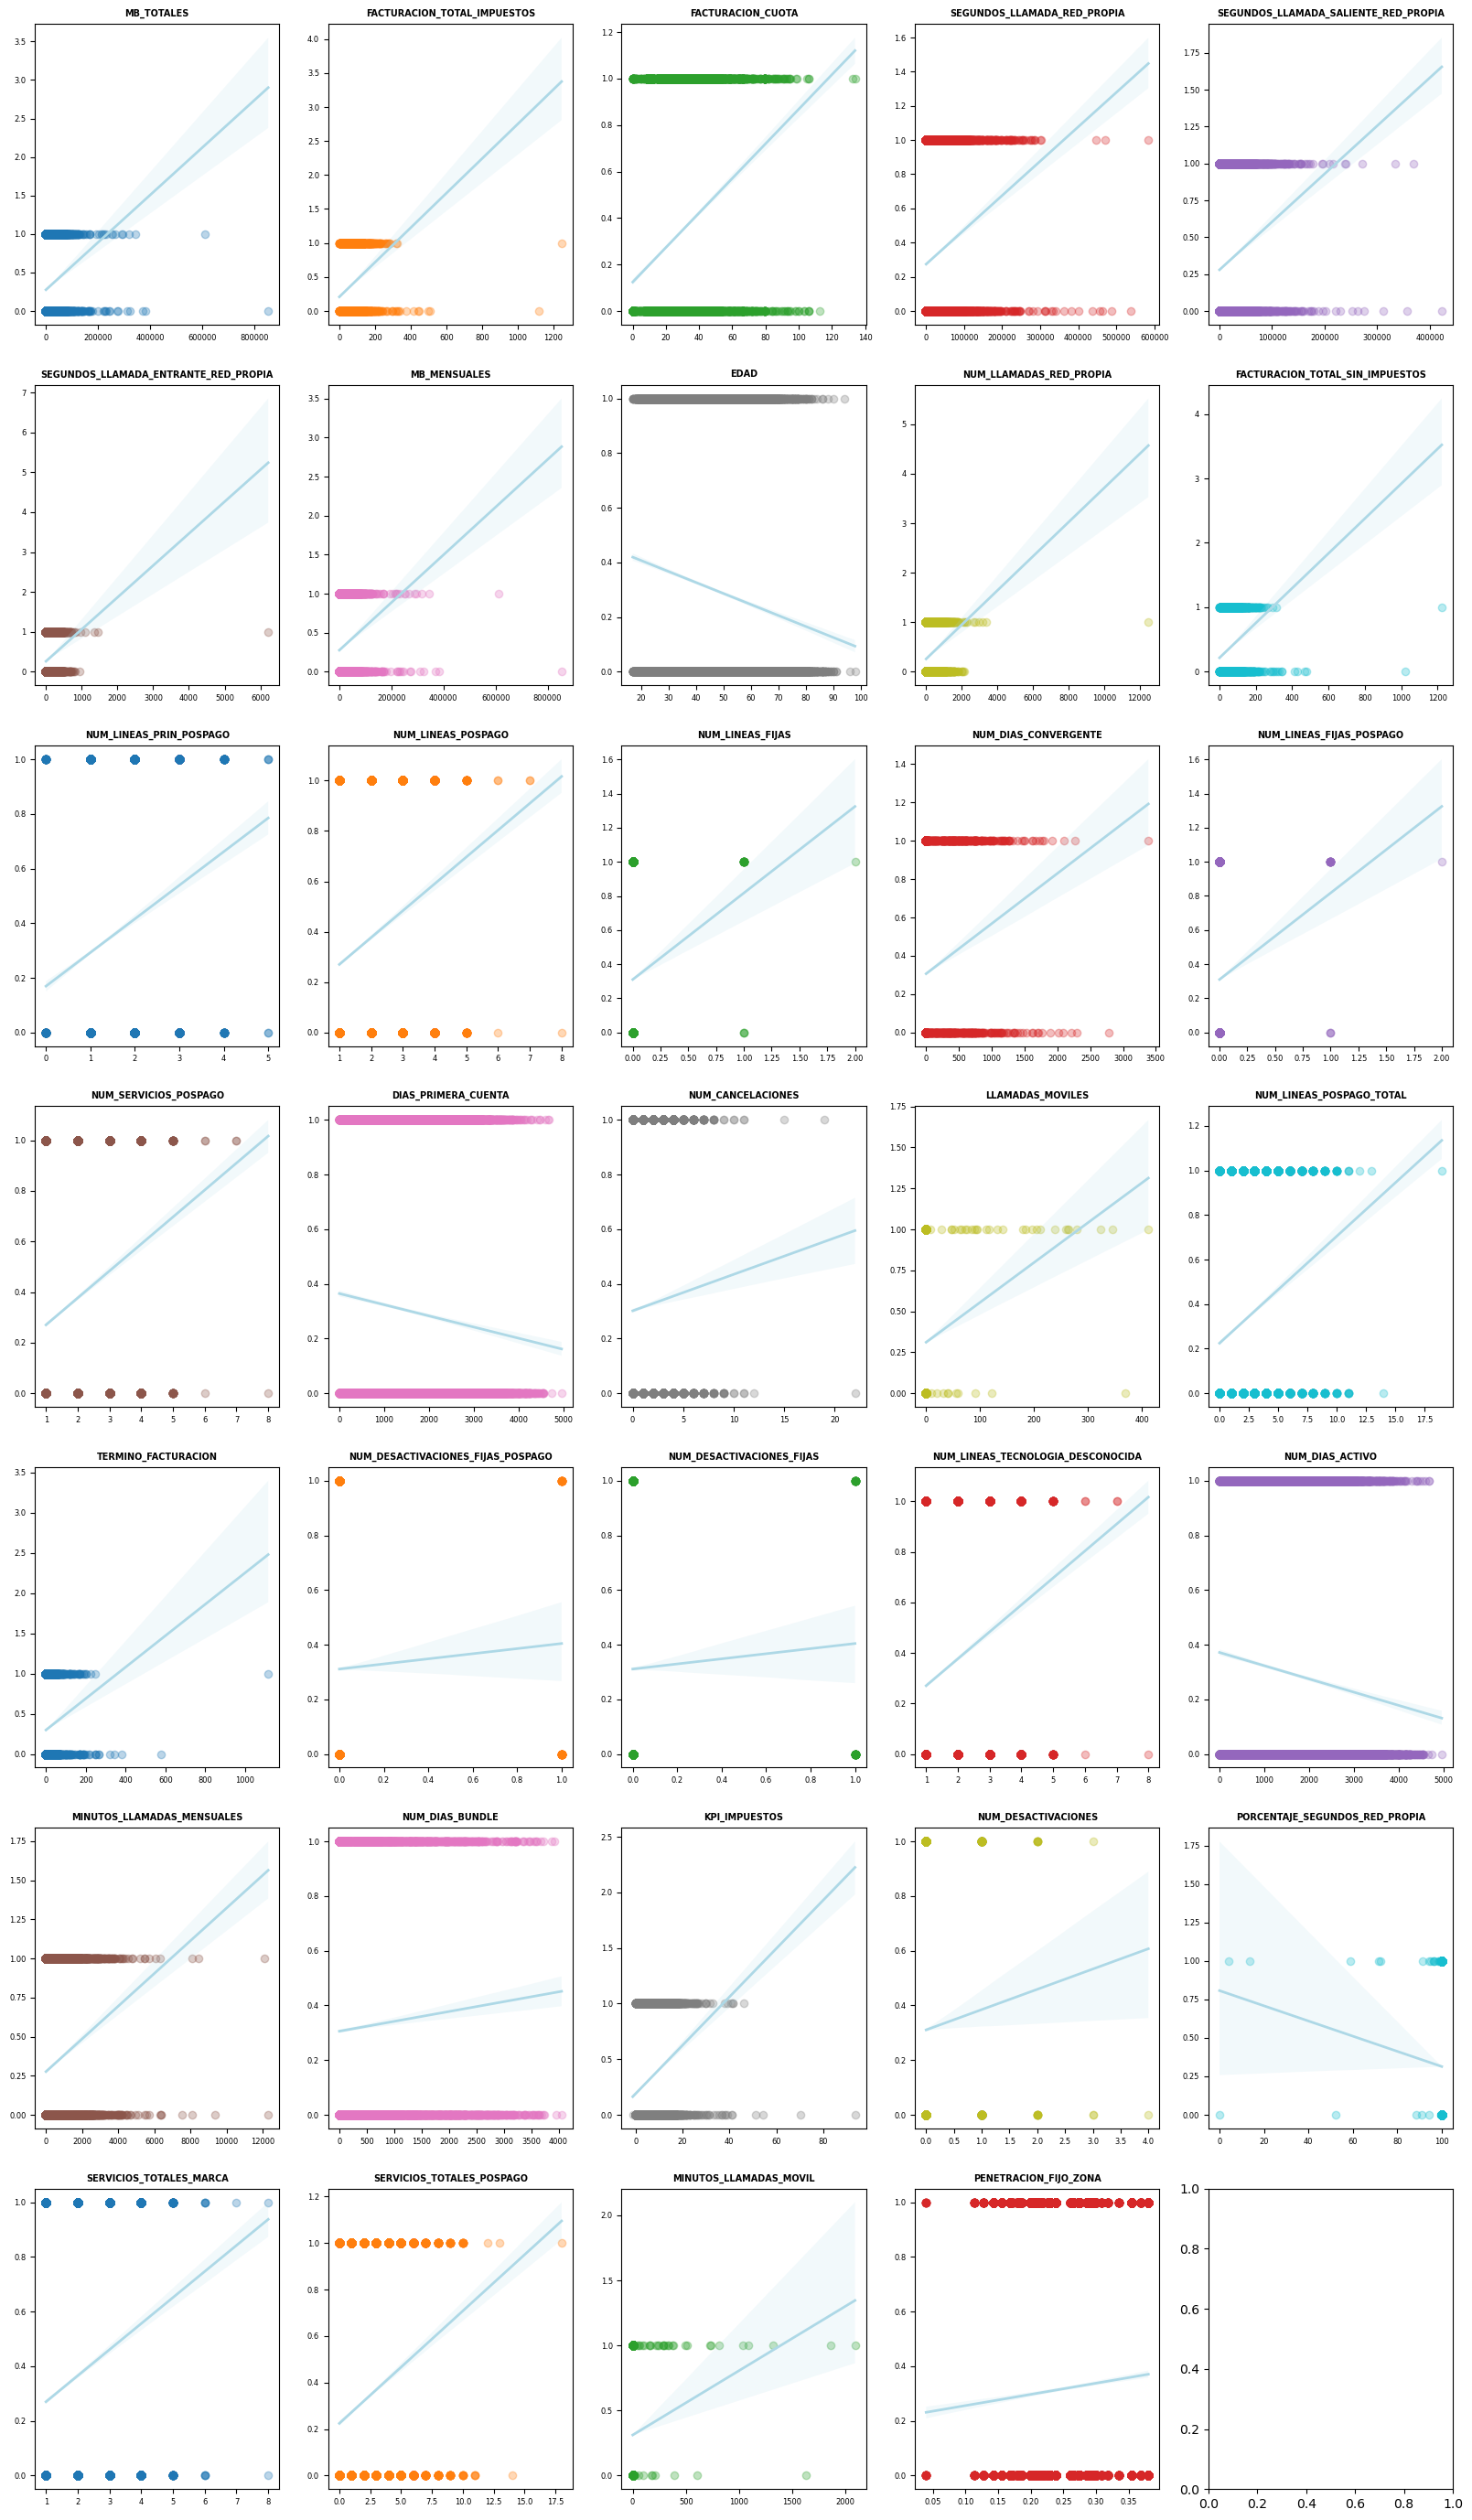

In [8]:
# Crear scatter plots con líneas de tendencia
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(20, 35))
axes = axes.flatten()
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop(['MES', 'TARGET'])
colors = [color['color'] for color in plt.rcParams['axes.prop_cycle']]

for i, col in enumerate(columnas_numeric):
    sns.regplot(
        data=df,
        x=col,
        y='TARGET',
        color=colors[i % len(colors)],
        line_kws={'color': 'lightblue', 'linewidth': 2},
        scatter_kws={'alpha': 0.3}
    , ax=axes[i])
    axes[i].set_title(col, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].grid(False)
plt.show()

Tipos de gráficas a observar:
1. Positivas: Gráficas donde a medida que aumenta la variable independiente ('TARGET'), el valor de la variable aumenta
    - MB_TOTALES (Cuando más MB totales consumidos, más posivilidad de adquirir un producto adicional)
    - FACTURACION_TOTAL_IMPUESTOS (Cuando más facturación total de impuestos, más posivilidad de adquirir un producto adicional)
    - FACTURACION_CUOTA (Cuando más facturación haya, más posivilidad de adquirir un producto adicional)
    - [...]

2. Negativas: Gráficas donde a medida que disminuye la variable independiente, el valor de la variable aumenta, lo que provoca un cliente no adquiera un producto adicional:
    - EDAD (Cuando más edad, menos posivilidad de adquirir un producto adicional)
    - NUM_DIAS_ACTIVO (Cuantos mas dias activos, menos posivilidad de adquirir un producto adicional)
    - DIA_PRIMERA_CUENTA (Cuatos mas dias pasen con una cuenta recien echa,  menos posivilidad de adquirir un producto adicional)

### 1.4. Tratamiento de nulos

<Axes: >

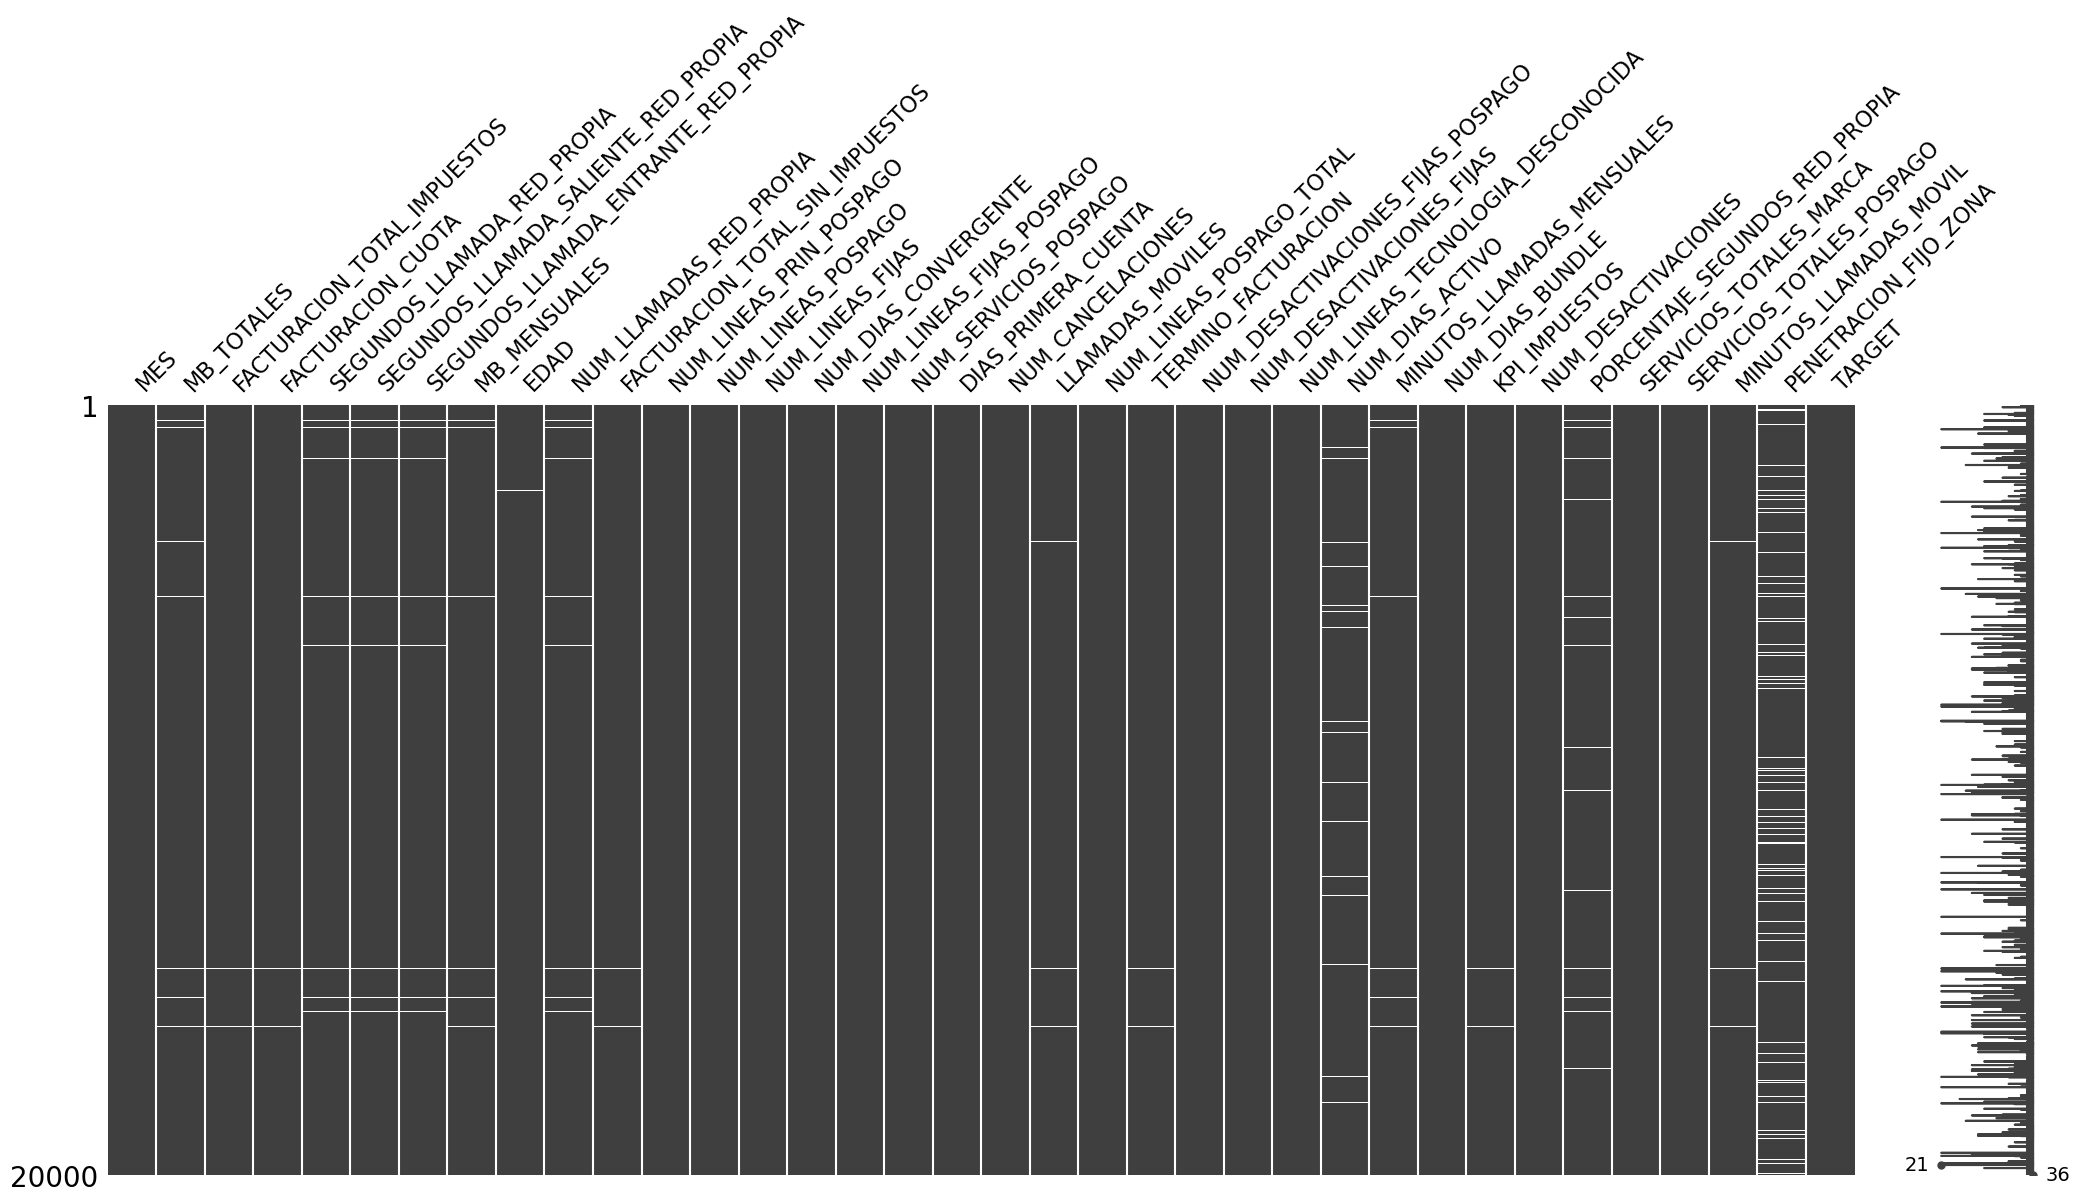

In [9]:
msno.matrix(df)

<Axes: >

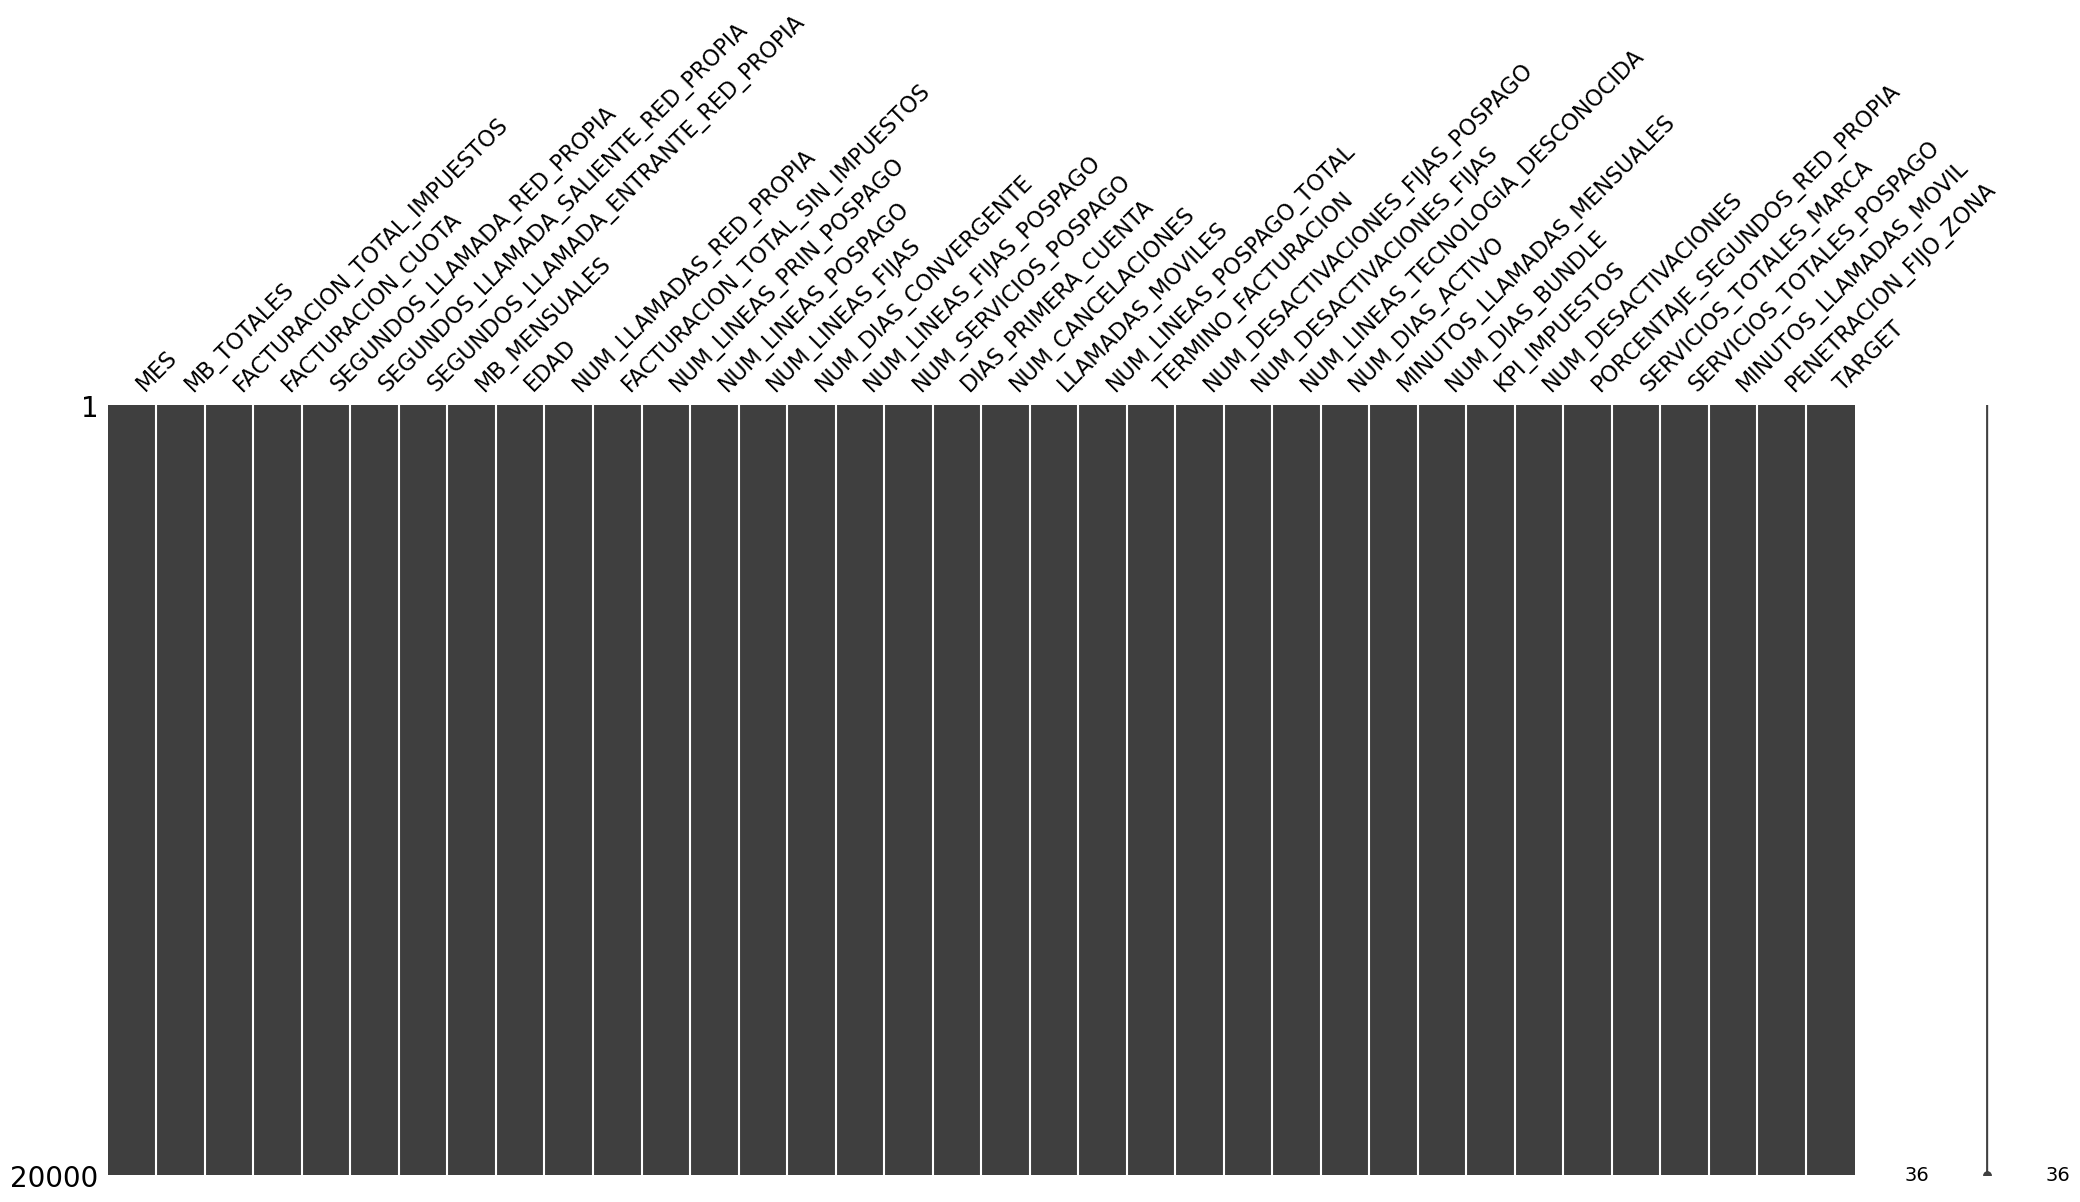

In [10]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
msno.matrix(df)

### 1.5. Distribucion de la variable objetivo

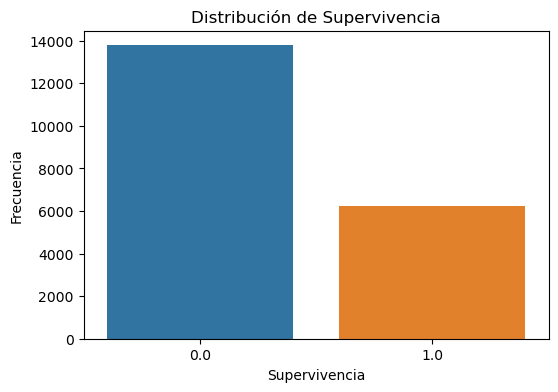

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='TARGET')
plt.title('Distribución de Supervivencia')
plt.xlabel('Supervivencia')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

### 1.6. Outliers

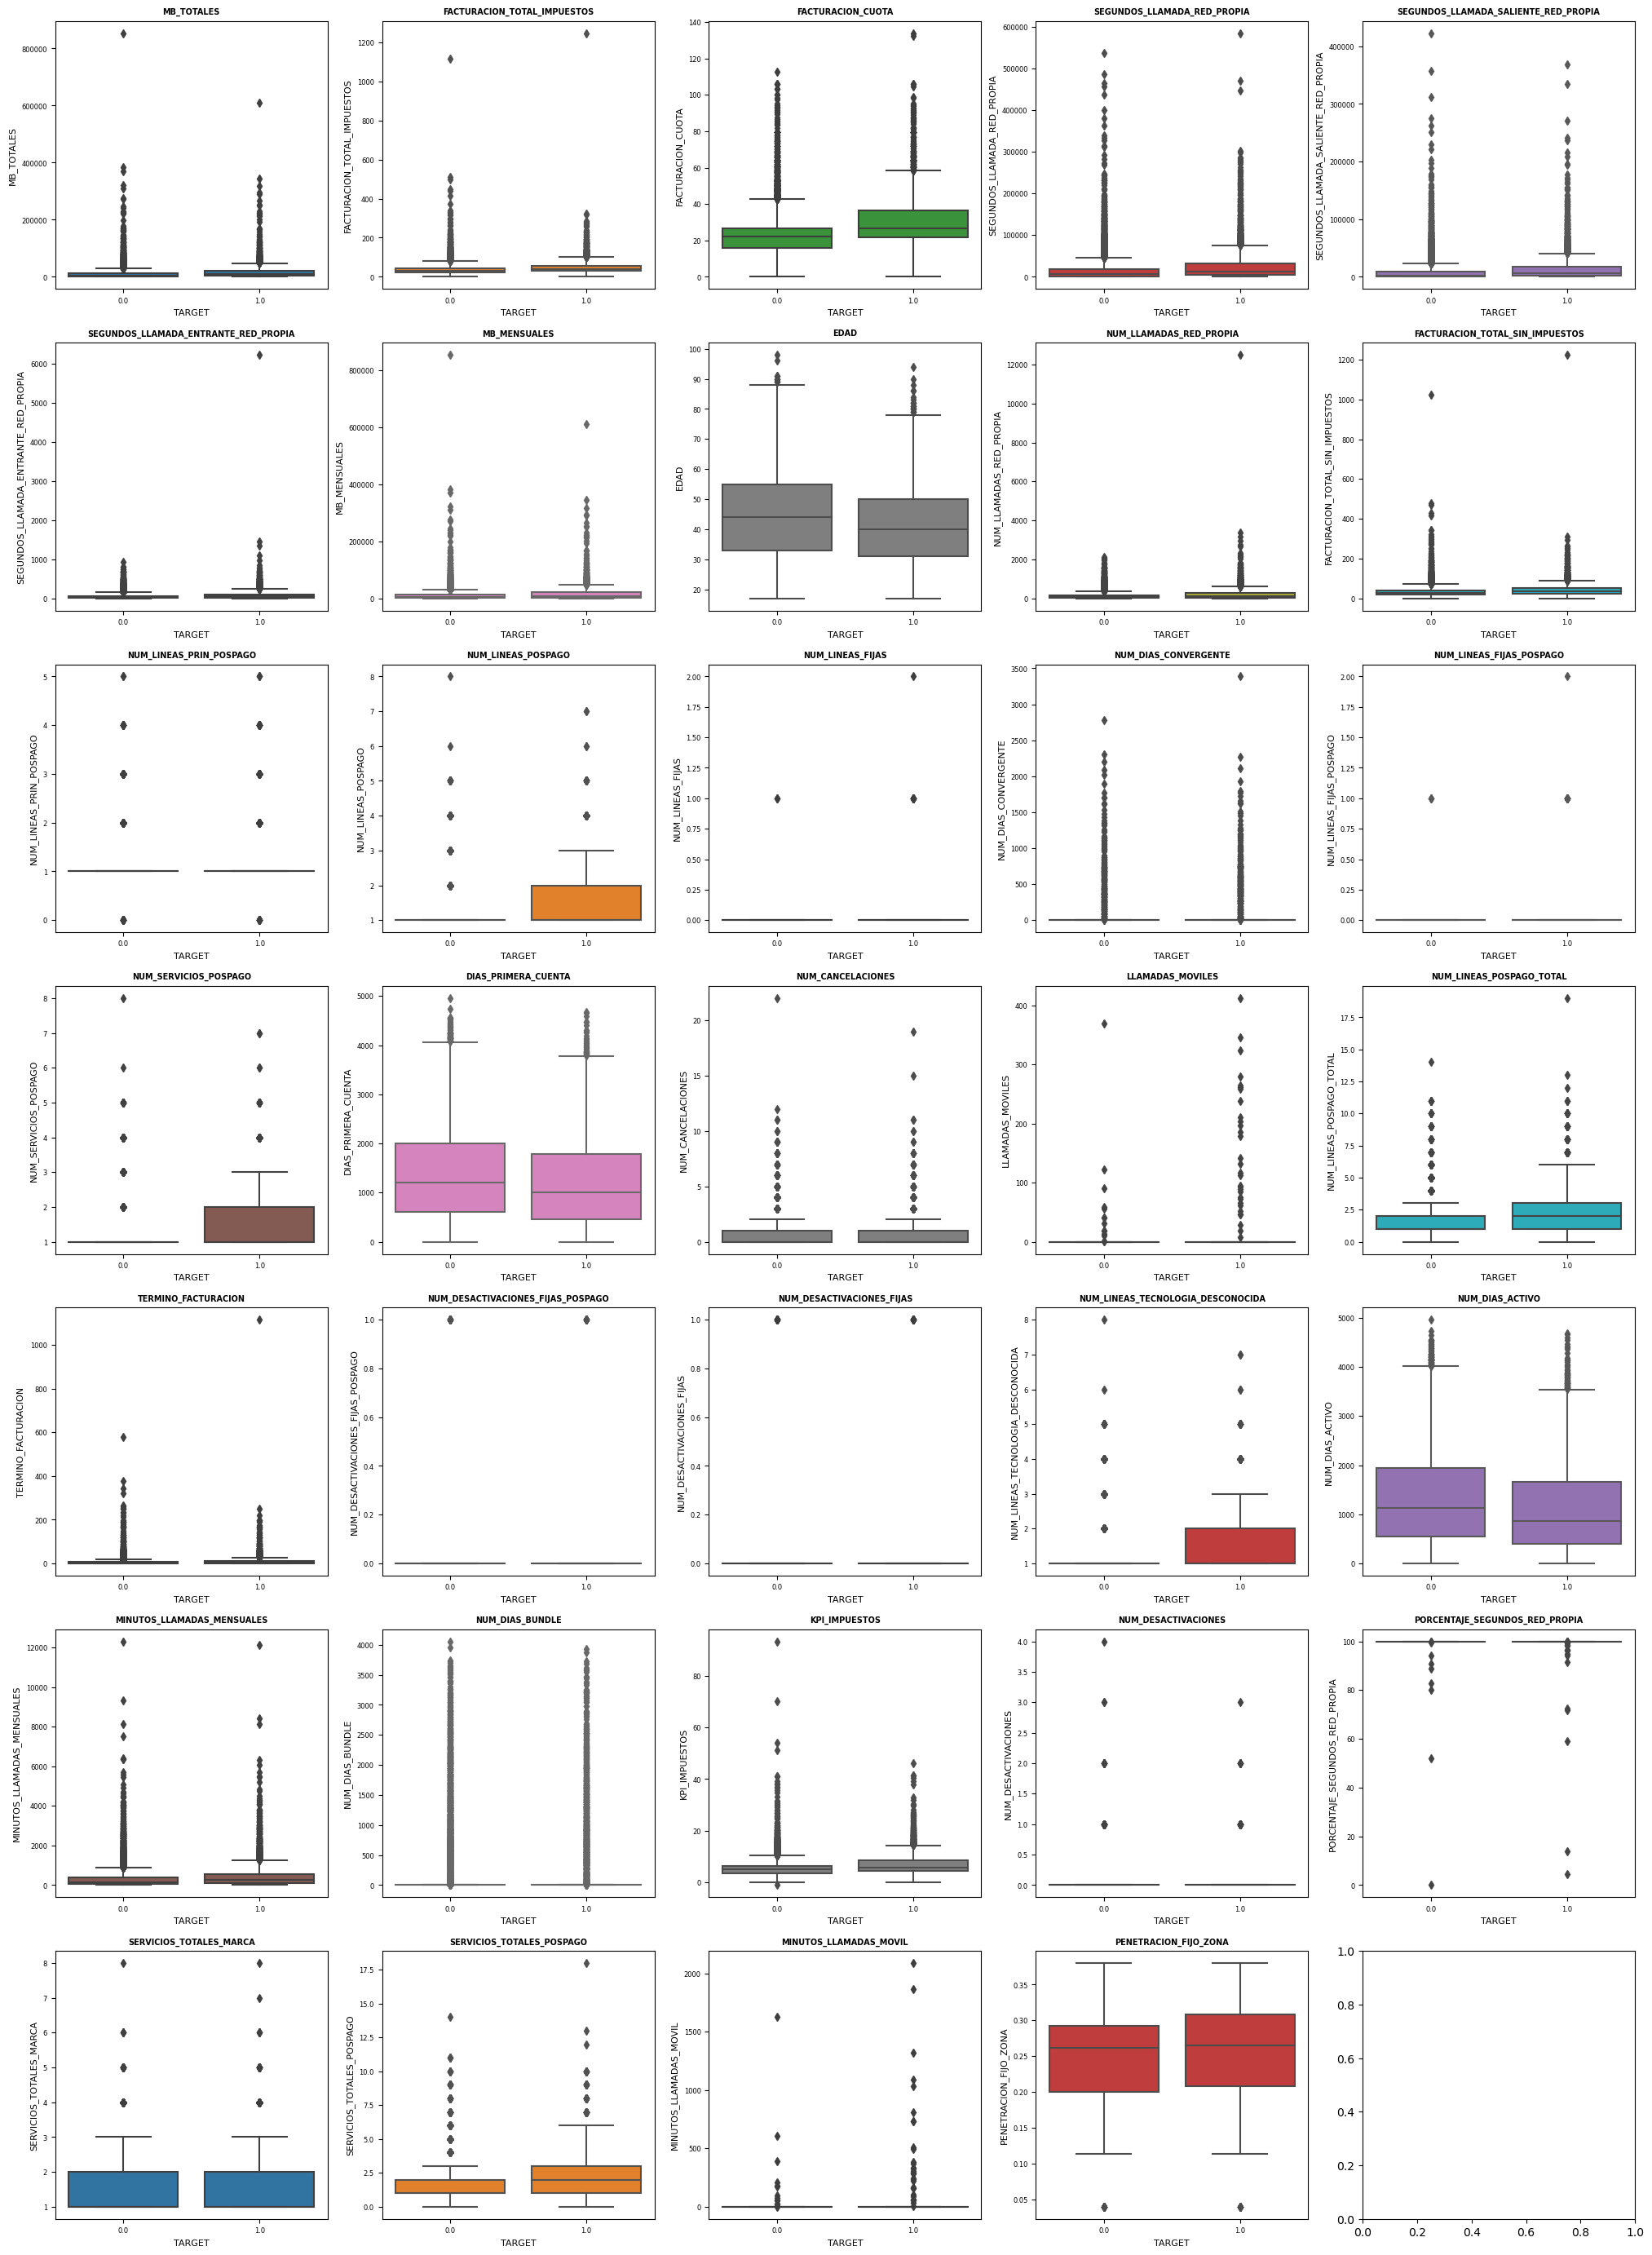

In [12]:
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(25, 35))
axes = axes.flatten()
colors = [color['color'] for color in plt.rcParams['axes.prop_cycle']]

for i, col in enumerate(columnas_numeric):
    sns.boxplot(
        data=df,
        y=col,
        x='TARGET',
        color=colors[i % len(colors)],
        ax=axes[i]
    )
    axes[i].set_title(col, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_ylabel(col, fontsize=8)
    axes[i].set_xlabel('TARGET', fontsize=8)
    axes[i].grid(False)
plt.show()

In [13]:
df_outliers = df.select_dtypes(include=['float64', 'int64'])
outlier_indices_above = []
outlier_indices_below = []
for column in df_outliers.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_above = df[column] > upper_bound
    outliers_below = df[column] < lower_bound
    
    outlier_indices_above.extend(outliers_above[outliers_above].index)
    outlier_indices_below.extend(outliers_below[outliers_below].index)

outlier_indices_above = pd.DataFrame(outlier_indices_above, columns=['Index'])
outlier_indices_below = pd.DataFrame(outlier_indices_below, columns=['Index'])

outlier_indices = pd.concat([outlier_indices_above, outlier_indices_below], axis=0)

df = df.drop(index=outlier_indices['Index']).reset_index(drop=True)

print(len(df))


9871


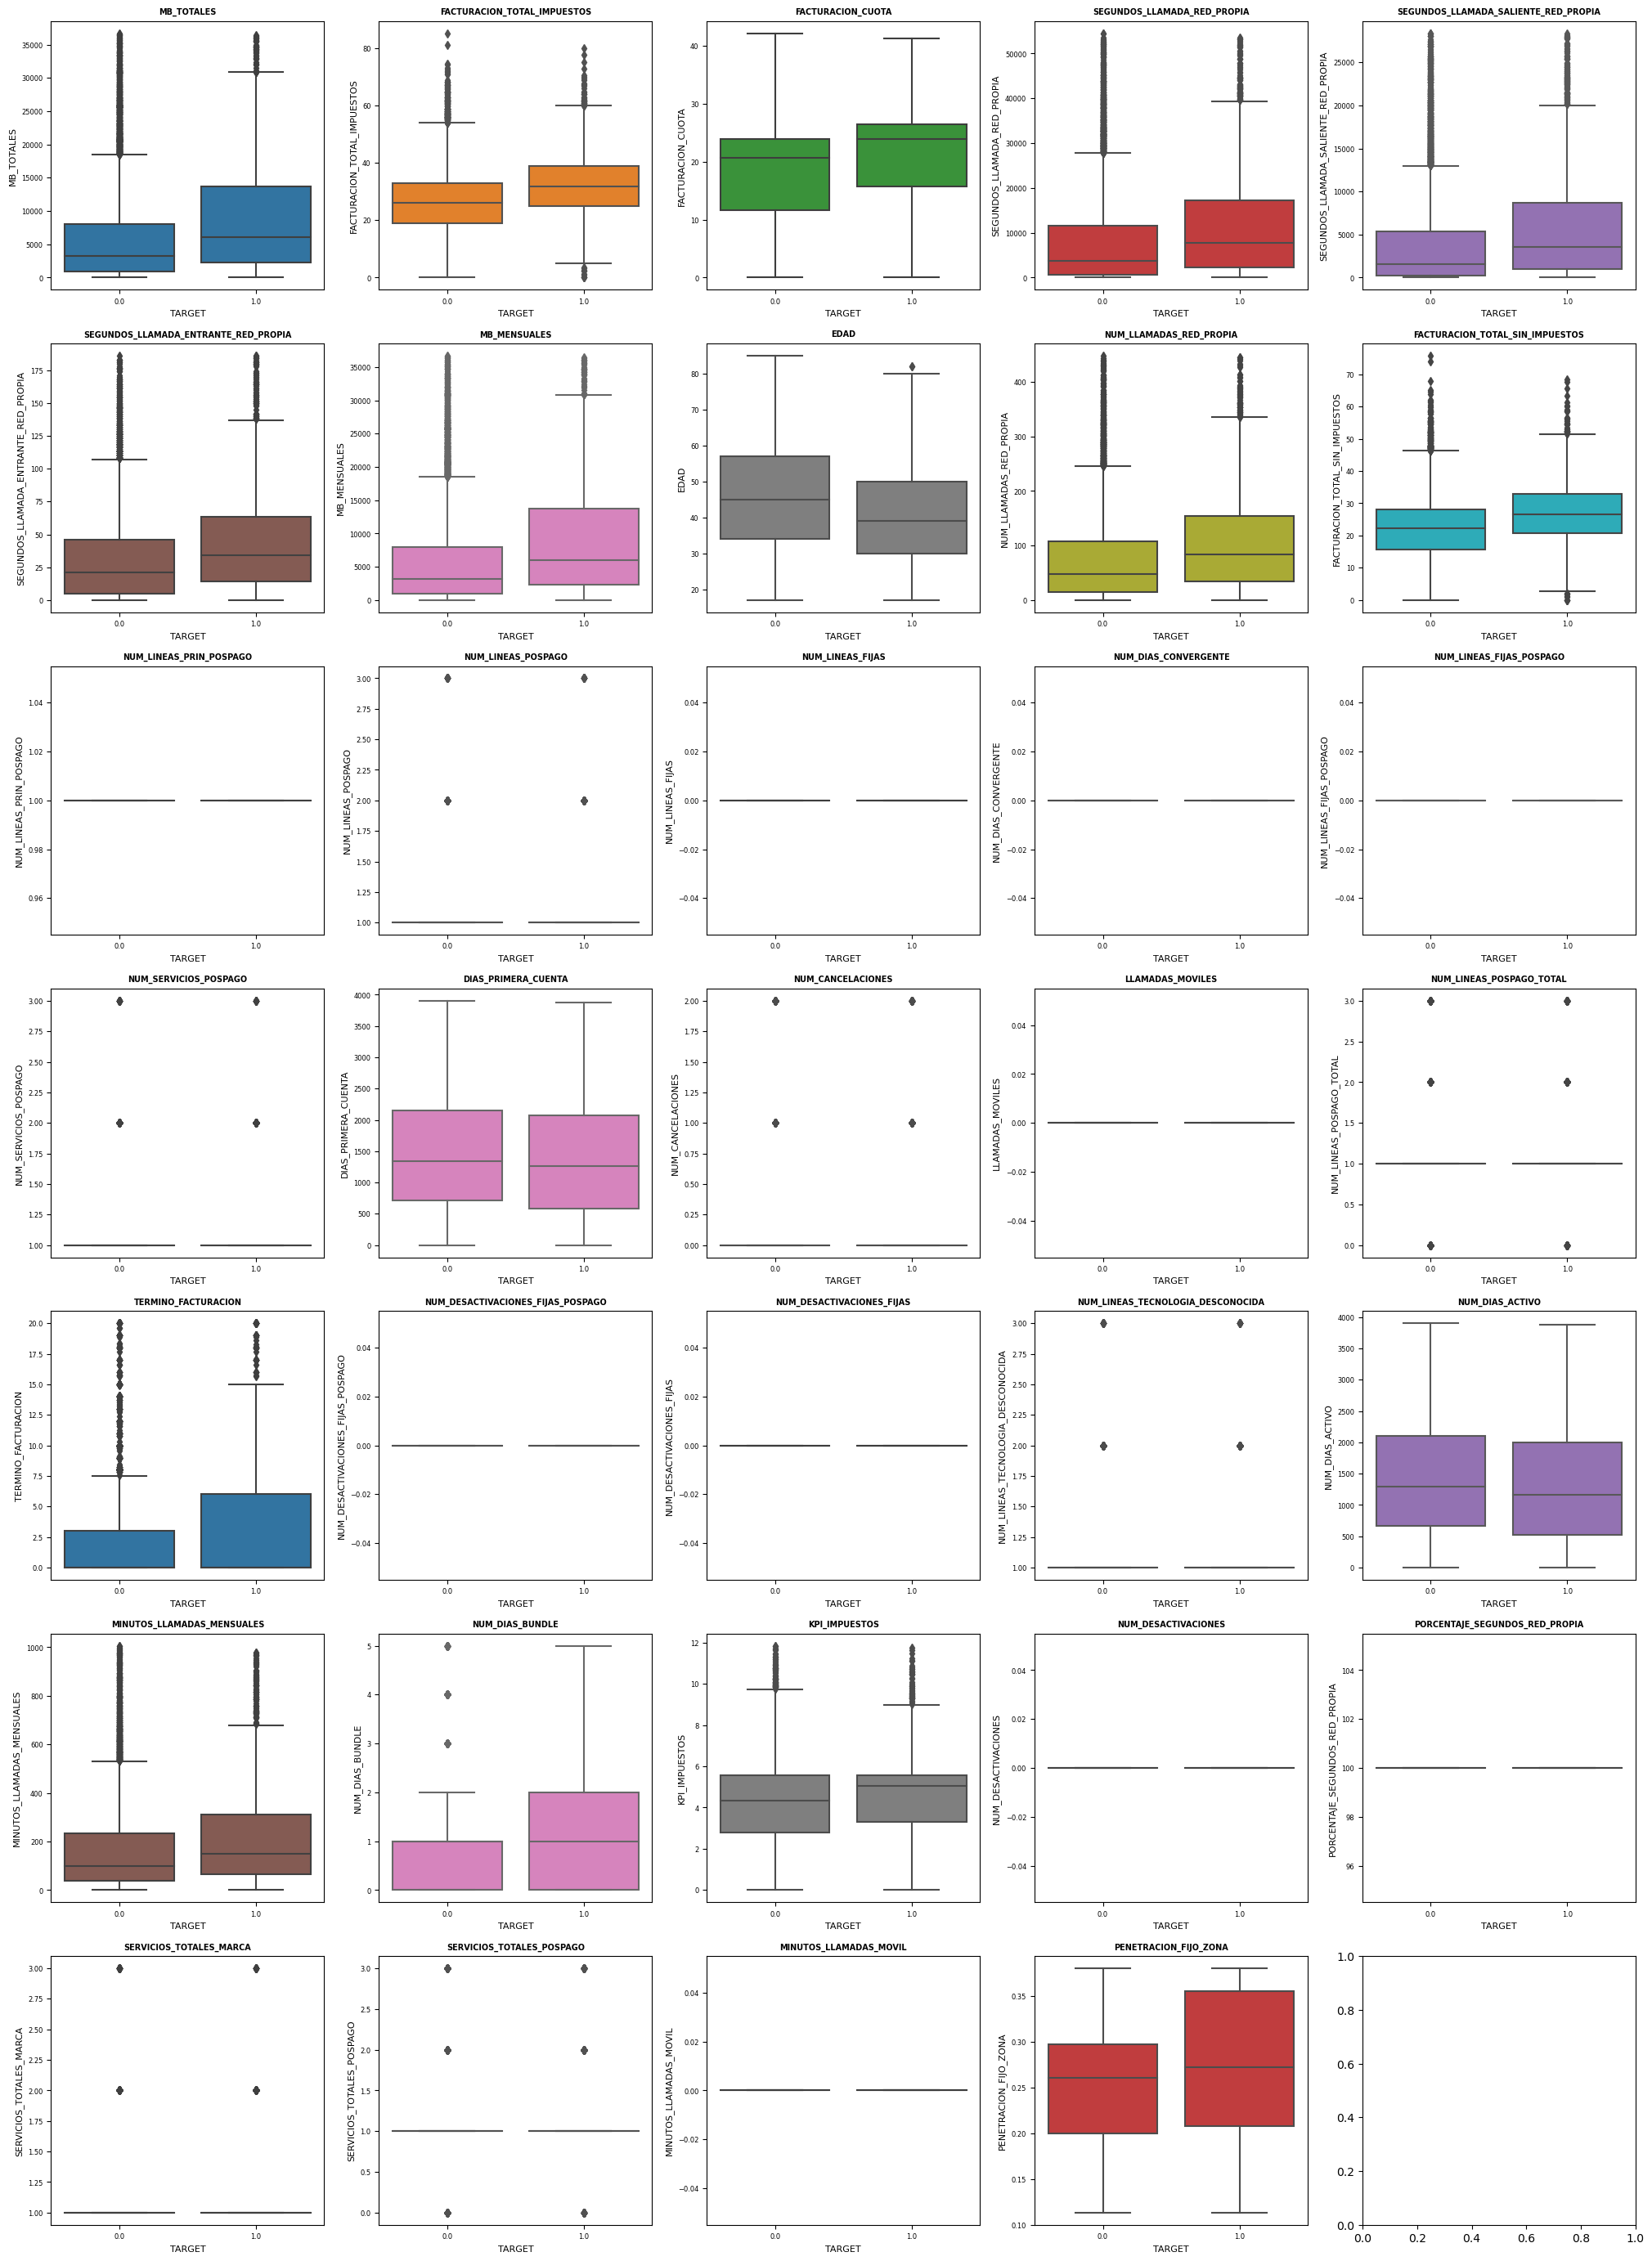

In [14]:
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(25, 35))
axes = axes.flatten()
colors = [color['color'] for color in plt.rcParams['axes.prop_cycle']]

for i, col in enumerate(columnas_numeric):
    sns.boxplot(
        data=df,
        y=col,
        x='TARGET',
        color=colors[i % len(colors)],
        ax=axes[i]
    )
    axes[i].set_title(col, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_ylabel(col, fontsize=8)
    axes[i].set_xlabel('TARGET', fontsize=8)
    axes[i].grid(False)
plt.show()

In [15]:
df_outliers = df.select_dtypes(include=['float64', 'int64'])
outlier_indices_above = []
outlier_indices_below = []
for column in df_outliers.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_above = df[column] > upper_bound
    outliers_below = df[column] < lower_bound
    
    outlier_indices_above.extend(outliers_above[outliers_above].index)
    outlier_indices_below.extend(outliers_below[outliers_below].index)

outlier_indices_above = pd.DataFrame(outlier_indices_above, columns=['Index'])
outlier_indices_below = pd.DataFrame(outlier_indices_below, columns=['Index'])

outlier_indices = pd.concat([outlier_indices_above, outlier_indices_below], axis=0)

df = df.drop(index=outlier_indices['Index']).reset_index(drop=True)

print(len(df))


3853


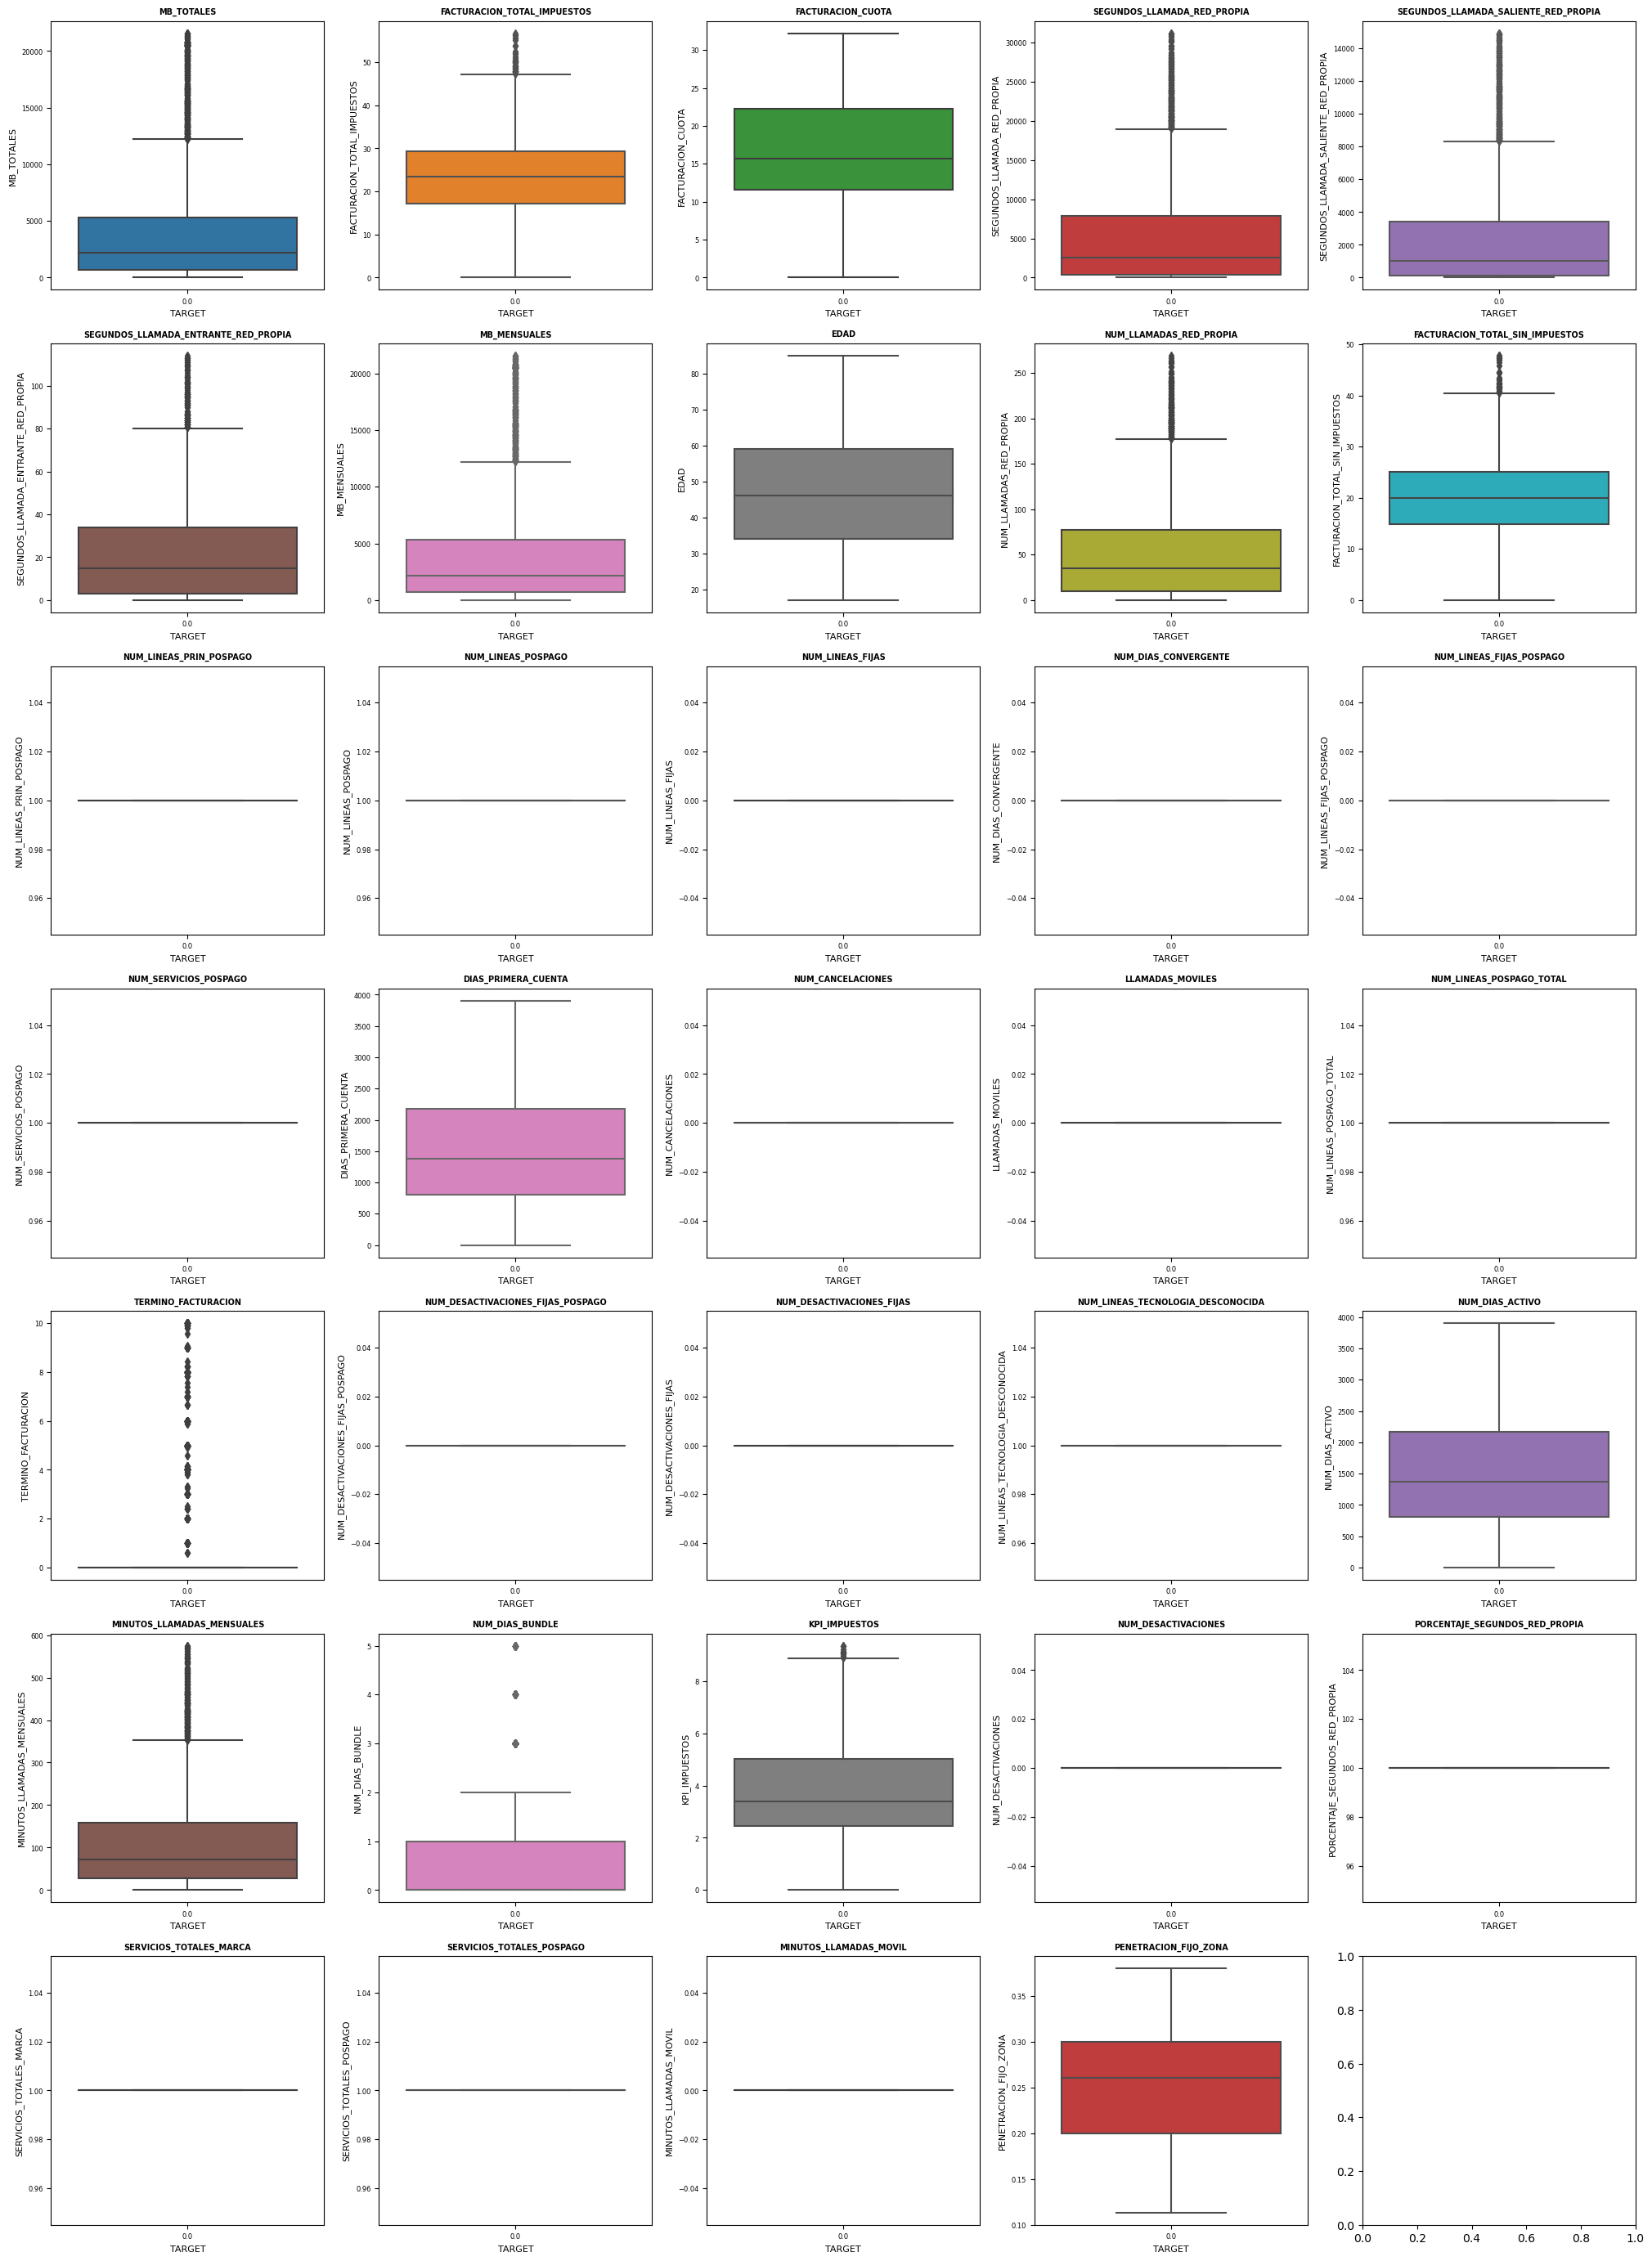

In [16]:
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(25, 35))
axes = axes.flatten()
colors = [color['color'] for color in plt.rcParams['axes.prop_cycle']]

for i, col in enumerate(columnas_numeric):
    sns.boxplot(
        data=df,
        y=col,
        x='TARGET',
        color=colors[i % len(colors)],
        ax=axes[i]
    )
    axes[i].set_title(col, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_ylabel(col, fontsize=8)
    axes[i].set_xlabel('TARGET', fontsize=8)
    axes[i].grid(False)
plt.show()

In [17]:
df_outliers = df.select_dtypes(include=['float64', 'int64'])
outlier_indices_above = []
outlier_indices_below = []
for column in df_outliers.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_above = df[column] > upper_bound
    outliers_below = df[column] < lower_bound
    
    outlier_indices_above.extend(outliers_above[outliers_above].index)
    outlier_indices_below.extend(outliers_below[outliers_below].index)

outlier_indices_above = pd.DataFrame(outlier_indices_above, columns=['Index'])
outlier_indices_below = pd.DataFrame(outlier_indices_below, columns=['Index'])

outlier_indices = pd.concat([outlier_indices_above, outlier_indices_below], axis=0)

df = df.drop(index=outlier_indices['Index']).reset_index(drop=True)
print(len(df))


2135


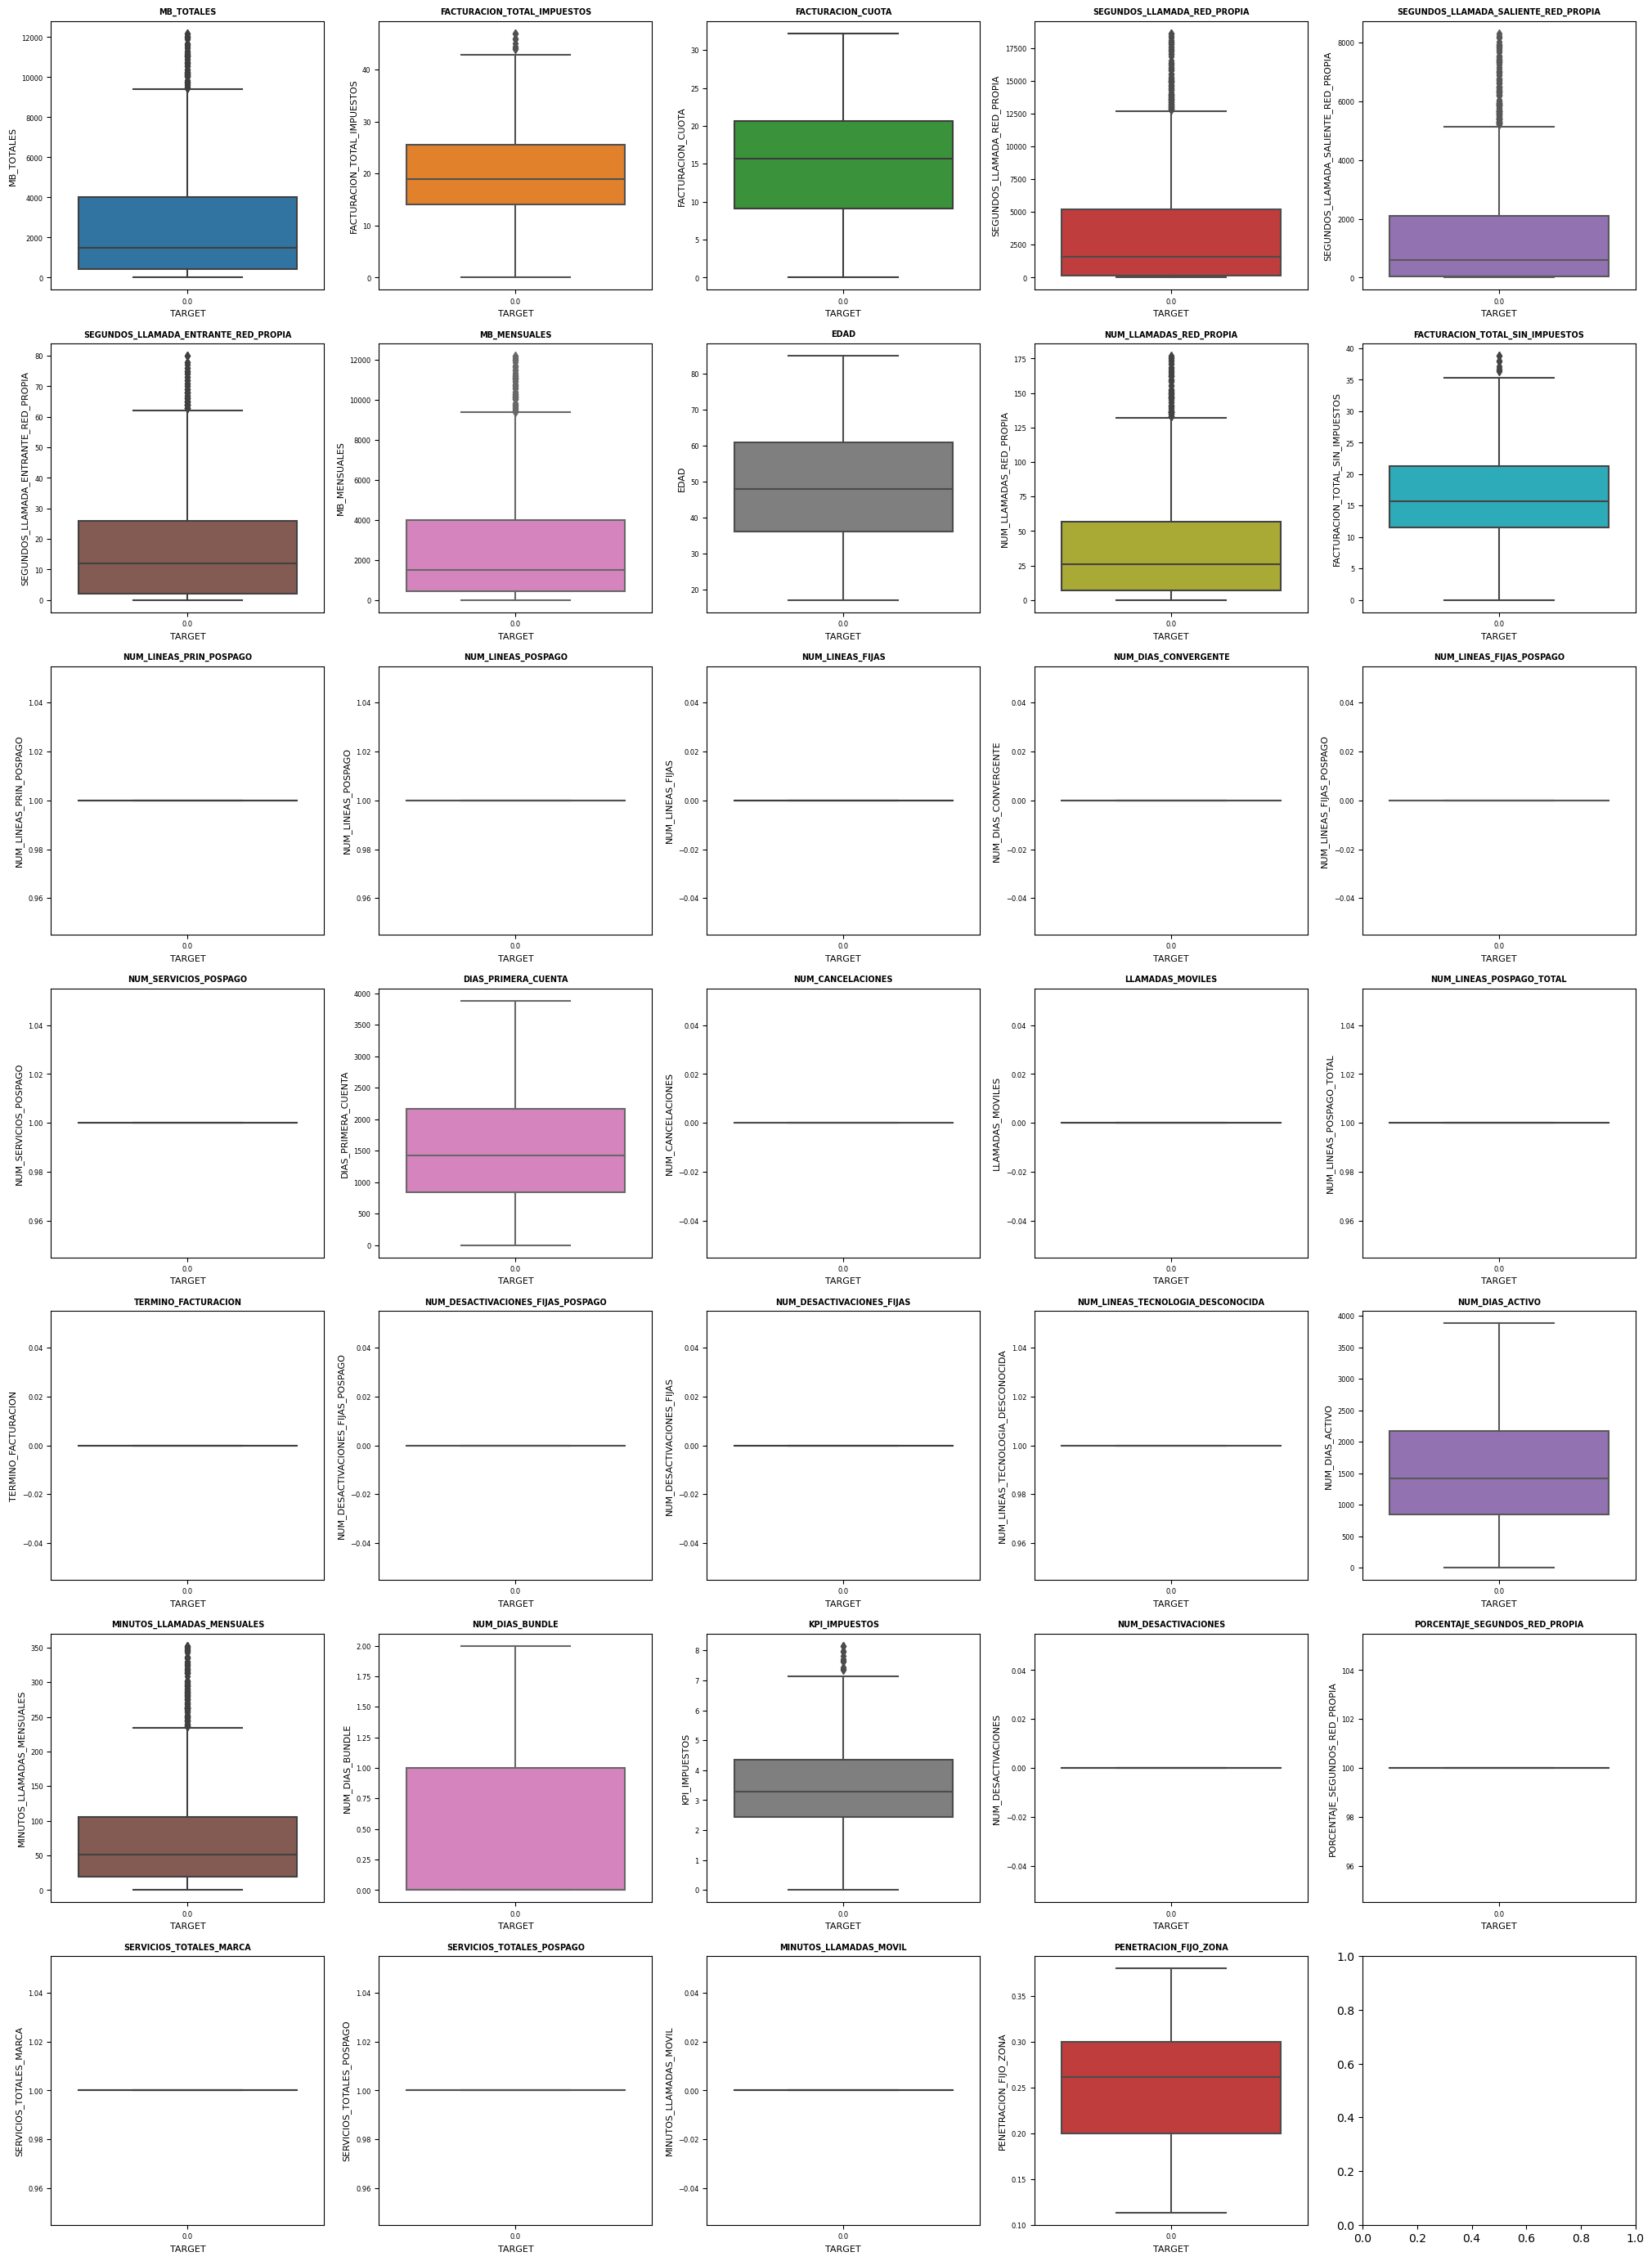

In [18]:
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(25, 35))
axes = axes.flatten()
colors = [color['color'] for color in plt.rcParams['axes.prop_cycle']]

for i, col in enumerate(columnas_numeric):
    sns.boxplot(
        data=df,
        y=col,
        x='TARGET',
        color=colors[i % len(colors)],
        ax=axes[i]
    )
    axes[i].set_title(col, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_ylabel(col, fontsize=8)
    axes[i].set_xlabel('TARGET', fontsize=8)
    axes[i].grid(False)
plt.show()

In [19]:

# df_outliers = df.select_dtypes(include=['float64', 'int64'])

# Q1 = df_outliers.quantile(0.25)
# Q3 = df_outliers.quantile(0.75)

# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# outliers_above = (df_outliers > upper_bound)
# outliers_below = (df_outliers < lower_bound)

# total_muestras = len(df_outliers)

# outliers = outliers_above.sum().sum() + outliers_below.sum().sum()

# porcentaje_outliers = (outliers / total_muestras) * 100

# print(f"Número total de muestras:{total_muestras}")
# print(f"Número de outliers totales:\n{outliers}")
# print(f"Porcentaje de outliers totales:\n{porcentaje_outliers}")

# outlier_indices_above = pd.DataFrame(outliers_above[outliers_above.sum(axis=1) > 0].index)
# outlier_indices_below = pd.DataFrame(outliers_below[outliers_below.sum(axis=1) > 0].index)

# outlier_indices = pd.concat([outlier_indices_above, outlier_indices_below], axis=1, ignore_index=True)

# df = df.drop(index=outlier_indices).reset_index(drop=True)

# print(len(df))

In [20]:
# # Crear el modelo LOF
# lof = LocalOutlierFactor(n_neighbors=20)
# df_outliers = df.select_dtypes(include=['float64', 'int64'])
# # Ajustar el modelo y predecir los outliers
# y_pred = lof.fit_predict(df_outliers)

# # El -1 indica un outlier, mientras que 1 indica un inlier
# df['outlier'] = y_pred

# # Filtrar los outliers
# outliers = df[df['outlier'] == -1]
# inliers = df[df['outlier'] == 1]

# # Contar el número total de muestras
# total_muestras = len(df)

# # Contar el número de outliers
# num_outliers = df['outlier'].value_counts().get(-1, 0)

# # Calcular el porcentaje de outliers
# porcentaje_outliers = (num_outliers / total_muestras) * 100

# print(f'Número total de muestras: {total_muestras}')
# print(f'Número de outliers: {num_outliers}')
# print(f'Porcentaje de outliers: {porcentaje_outliers:.2f}%')

# # Obtener los índices de los outliers
# outlier_indices = df[df['outlier'] == -1].index

# # Eliminar los outliers de X y y utilizando los índices
# X_cleaned = df.drop(index=outlier_indices).reset_index(drop=True)
# print(len(X_cleaned))

### 1.7. Análisis de correlación

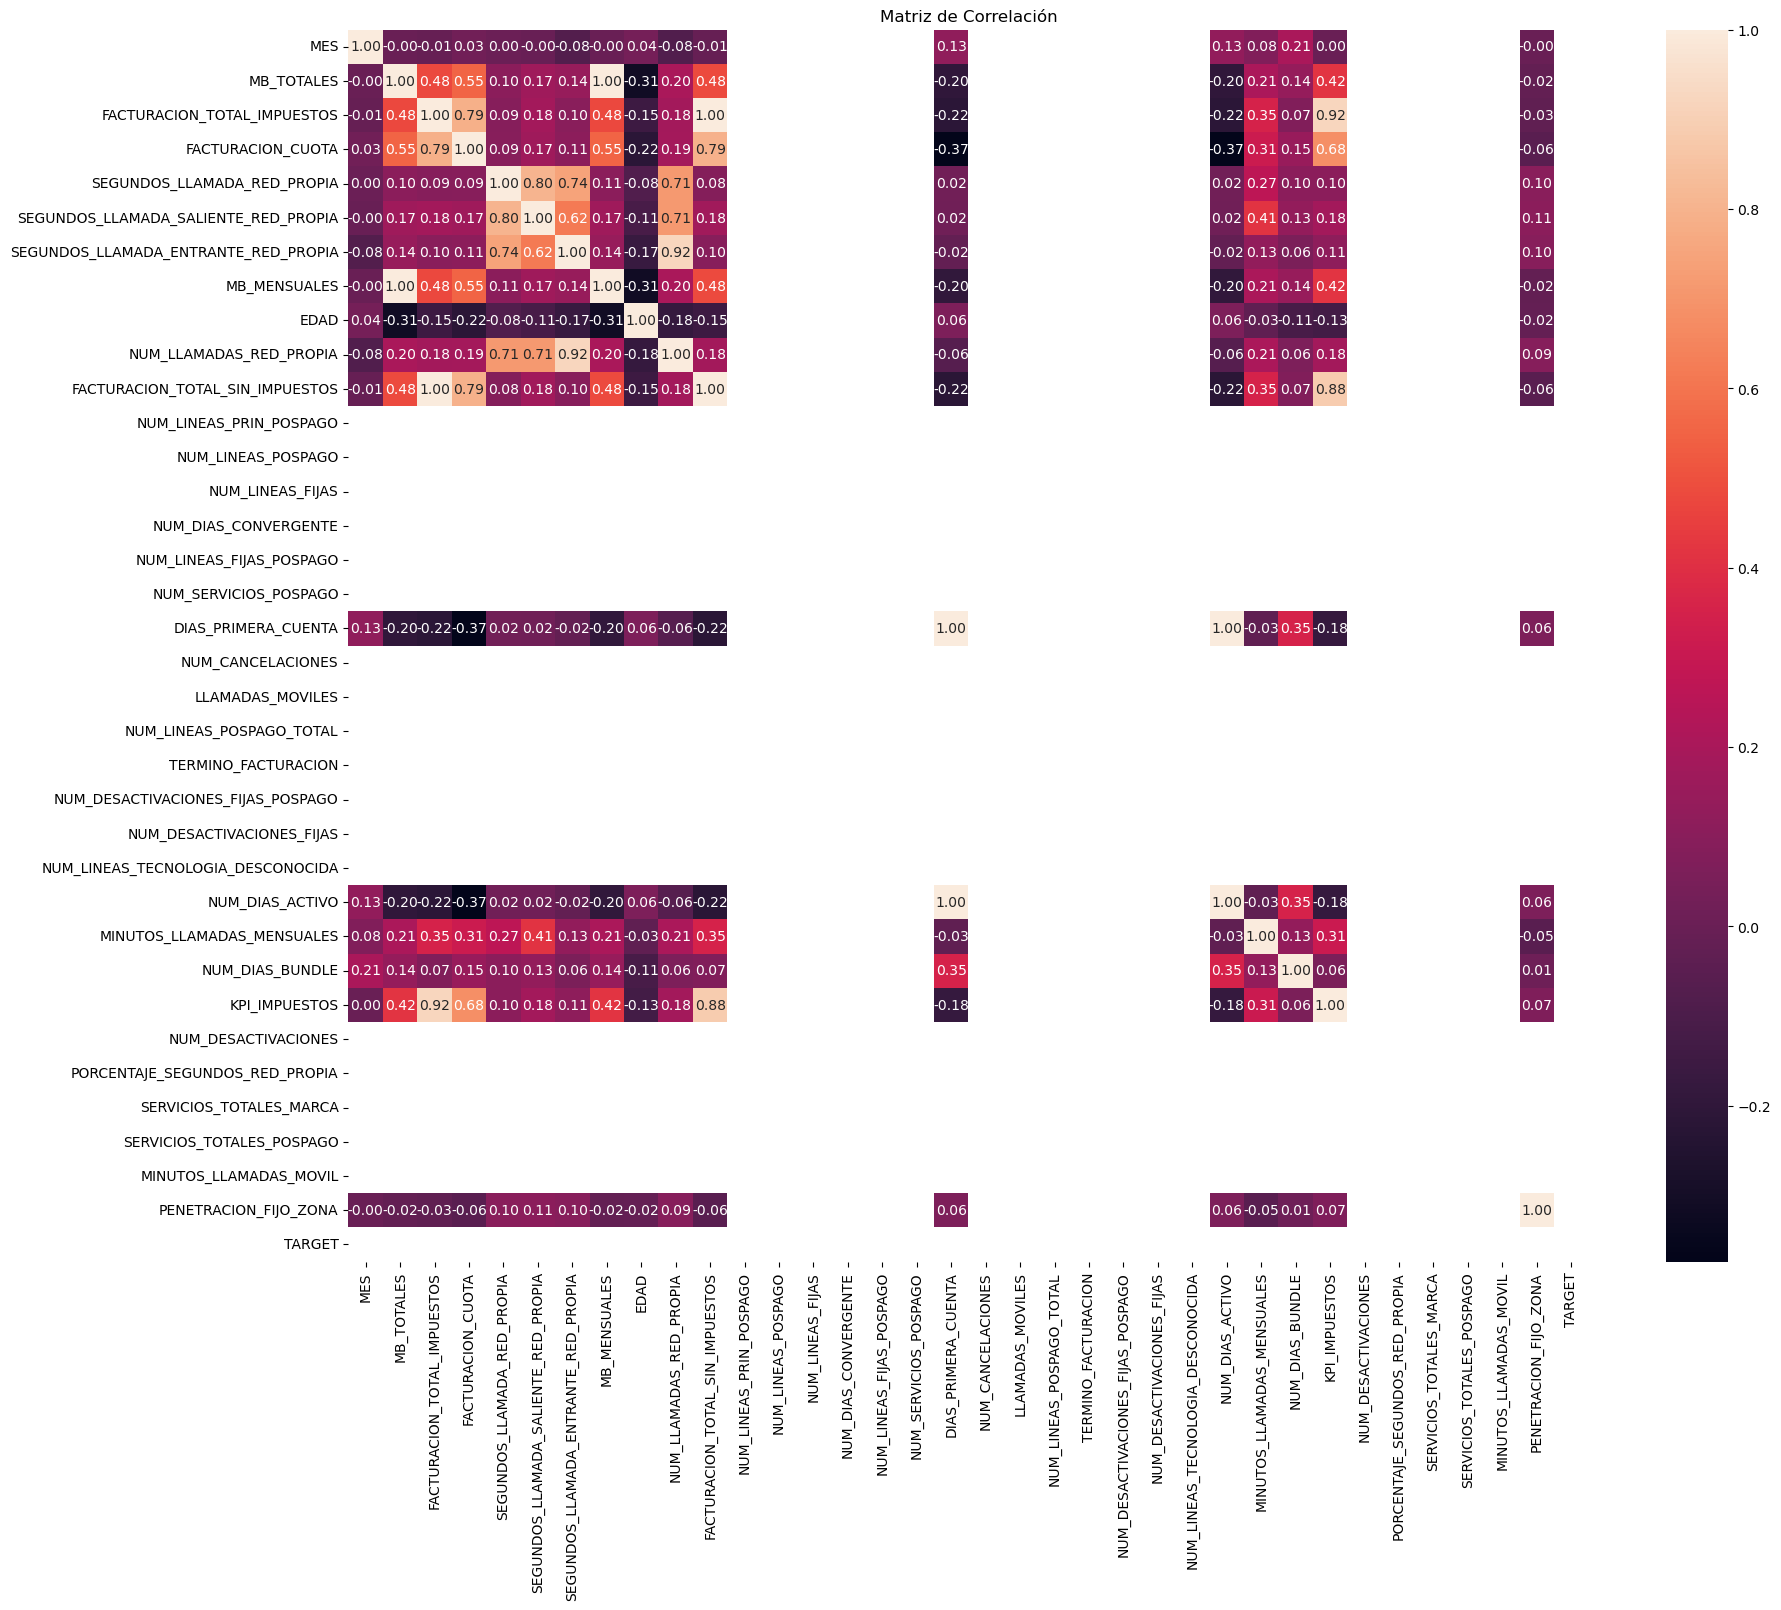

In [21]:
matriz_correlaciones = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(matriz_correlaciones, annot=True, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Observaciones de correlación:
 - Numerosas variables con correlacion de 1, lo que significa que ocupan los mismos valores, ya que aumentan paralelamente.

 Observaciones de datos:

Interpretación de colores: 
- MB_TOTALES se mide en meses (correlación 1 respecto MB_MENSUALES)
- Los usuarios que se crean recientemente una cuenta suelen estar muy activos
- Cuantos más errores en el servicio(NUM_DIAS_BUNDLE), menos actividad (NUM_DIAS_ACTIVO)
- [...]

Referencias:

 - Documentación vista en clase (Regresion_PrecioDiamantes.ipynb)

 - [Interpretación de correlación](https://www.cimec.es/coeficiente-correlacion-pearson/#:~:text=Un%20valor%20mayor%20que%200,una%20relaci%C3%B3n%20lineal%20positiva%20perfecta.)

 Valores de coorelacion similar como (NUM_DESACTIVACIONES_FIJAS_POSPAGO y NUM_DESACTIVACIONES_FIJAS) y (NUM_LINEAS_TECNOLOGIA_DESCONOCIDA y NUM_SERVICIOS_POSPAGO), por lo que al tener estas los mismos valores se procede a la eliminacion de una de las 2

In [22]:
if 'NUM_DESACTIVACIONES_FIJAS' in df.columns:
    df = df.rename(columns={'NUM_DESACTIVACIONES_FIJAS_POSPAGO': 'DESACTIVACIONES_FIJAS_POSPAGO_INCL_DESACTIVACIONES_FIJAS'})
    df = df.drop(columns=['NUM_DESACTIVACIONES_FIJAS'])

if 'NUM_LINEAS_TECNOLOGIA_DESCONOCIDA' in df.columns:
    df = df.rename(columns={'NUM_SERVICIOS_POSPAGO': 'SERVICIOS_POSPAGO_INCL_LINEAS_TECNOLOGIA_DESCONOCIDA'})
    df = df.drop(columns=['NUM_LINEAS_TECNOLOGIA_DESCONOCIDA'])

## 2. Preparación de los datos para el modelado

### 2.1. Selección de variables de entrenamiento.

In [23]:
X = df.drop(['TARGET', 'MES'], axis=1)
y = df['TARGET']

### 2.2. Estandarización

In [24]:
columnas_num = X.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
x_scaled = scaler.fit_transform(columnas_num)
x_estandarizado = pd.DataFrame(x_scaled, columns=X.columns)
X = X.drop(columns=columnas_num.columns).reset_index(drop=True)
X = pd.concat([X, x_estandarizado], axis=1)
X.head()

,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,MB_MENSUALES,EDAD,NUM_LLAMADAS_RED_PROPIA,FACTURACION_TOTAL_SIN_IMPUESTOS,...,NUM_DIAS_ACTIVO,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,SERVICIOS_TOTALES_POSPAGO,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA
0,-0.373146,-0.123241,0.132228,0.815852,0.301678,1.366013,-0.372242,-0.173830,1.015818,-0.139868,...,0.359882,-0.470191,0.592947,-0.035537,0.0,0.0,0.0,0.0,0.0,-0.255610
1,-0.944053,1.188210,1.395573,-0.443384,-0.157845,-0.442939,-0.943660,1.253085,-0.595108,1.158618,...,-0.096308,3.220404,2.002682,1.209517,0.0,0.0,0.0,0.0,0.0,1.323228
2,-0.658773,-1.214747,-0.891279,-0.812271,-0.763004,-0.951707,-0.658125,1.512524,-0.991238,-1.220615,...,0.823823,-1.001137,-0.816788,-1.071631,0.0,0.0,0.0,0.0,0.0,-0.525409
3,0.409521,0.125624,-0.498680,-0.279735,-0.756936,-0.273350,0.411124,-1.017008,-0.568700,0.106479,...,-0.391945,-1.001137,0.592947,0.200994,0.0,0.0,0.0,0.0,0.0,1.662483
4,1.004386,-0.139293,0.132228,-0.771421,-0.709494,-0.838647,1.006521,-1.471026,-0.832786,-0.155761,...,-1.008687,-0.336893,-0.816788,-0.050774,0.0,0.0,0.0,0.0,0.0,-0.663056
